In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
from keras.models import Model, Sequential
from keras.layers import Input, Activation, Dense
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
#masukan DataTrain.CSV Sebagai Data Train
sf_train = pd.read_csv(r"C:\Users\Kodeic\Documents\Python\the-movies-dataset\DataTrain.csv")
sf_train.head()

,Unnamed: 0,title,vote_average,vote_count,popularity
0,0,Toy Story,7.7,5415.0,21.946943
1,1,Jumanji,6.9,2413.0,17.015539
2,2,Grumpier Old Men,6.5,92.0,11.712900
3,3,Waiting to Exhale,6.1,34.0,3.859495
4,4,Father of the Bride Part II,5.7,173.0,8.387519


In [3]:
#Buat kolom baru (untuk paramater) berdasarkan kolom "vote_average" jika lebih dari 5 maka akan bernilai 1 dan sebaliknya 0
sf_train.loc[sf_train.vote_average > 5 , "Rekomendasi"] = [1]
sf_train.loc[sf_train.vote_average < 5 , "Rekomendasi"] = [0]

In [4]:
sf_train.dtypes

Unnamed: 0        int64
title            object
vote_average    float64
vote_count      float64
popularity      float64
Rekomendasi     float64
dtype: object

In [5]:
#Ubah type data kolom "Rekomendasi" menjadi int64
sf_train = sf_train.fillna(0)
sf_train["Rekomendasi"] = sf_train["Rekomendasi"].astype('int64')

In [6]:
sf_train.dtypes

Unnamed: 0        int64
title            object
vote_average    float64
vote_count      float64
popularity      float64
Rekomendasi       int64
dtype: object

In [7]:
#untuk mensortir hanya kolom title,vote_average,voute_count,popularity dan Rekomendasi saja yang diambil
#untuk dijadikan sebagai input & output Data Train
sf_train = sf_train.loc[:,["title","vote_average","vote_count","popularity","Rekomendasi"]]

In [8]:
sf_train.head()

,title,vote_average,vote_count,popularity,Rekomendasi
0,Toy Story,7.7,5415.0,21.946943,1
1,Jumanji,6.9,2413.0,17.015539,1
2,Grumpier Old Men,6.5,92.0,11.712900,1
3,Waiting to Exhale,6.1,34.0,3.859495,1
4,Father of the Bride Part II,5.7,173.0,8.387519,1


In [9]:
#masukan DataTest.CSV Sebagai Data Validasi yang telah di ambil secara random dari DataTest.CSV
sf_val = pd.read_csv(r"C:\Users\Kodeic\Documents\Python\the-movies-dataset\DataTest.csv")
sf_val.head()

,Unnamed: 0,Unnamed: 0.1,title,vote_average,vote_count,popularity
0,80,34987,Eagles Over London,5.8,3.0,0.444586
1,84,35200,Maidan,10.0,3.0,0.163550
2,33,391,Fall Time,6.3,6.0,1.108494
3,81,33752,Midnight FM,6.9,36.0,1.924528
4,93,5856,Nicholas Nickleby,6.8,50.0,4.056577


In [10]:
#Buat kolom baru (untuk paramater) berdasarkan kolom "vote_average" jika lebih dari 5 maka akan bernilai 1 dan sebaliknya 0
sf_val.loc[sf_val.vote_average > 5 , "Rekomendasi"] = [1]
sf_val.loc[sf_val.vote_average < 5 , "Rekomendasi"] = [0]

In [11]:
#Ubah type data kolom "Rekomendasi" menjadi int64
sf_val = sf_val.fillna(0)
sf_val["Rekomendasi"] = sf_val["Rekomendasi"].astype('int64')

In [12]:
#untuk mensortir hanya kolom title,vote_average,voute_count,popularity dan Rekomendasi saja yang diambil
#untuk dijadikan sebagai input & output Data Validasi
sf_val = sf_val.loc[:,["title","vote_average","vote_count","popularity","Rekomendasi"]]

In [13]:
sf_val.dtypes

title            object
vote_average    float64
vote_count      float64
popularity      float64
Rekomendasi       int64
dtype: object

In [14]:
# Dapatkan nilai array Pandas (Konversi ke array NumPy)
train_data = sf_train.values
val_data = sf_val.values

In [15]:
pd.DataFrame(train_data)
pd.DataFrame(val_data)

,0,1,2,3,4
0,Eagles Over London,5.8,3,0.444586,1
1,Maidan,10,3,0.16355,1
2,Fall Time,6.3,6,1.10849,1
3,Midnight FM,6.9,36,1.92453,1
4,Nicholas Nickleby,6.8,50,4.05658,1
5,The Last Band in Lebanon,0,0,0.49439,0
6,"Connasse, Princesse des cœurs",5.9,215,4.47674,1
7,The Law Is the Law,7.2,13,0.591066,1
8,Sulemani Keeda,0,1,0.10162,0
9,New in Town,5.2,99,12.3571,1


In [16]:
#Gunakan kolom 2 & 3 (vote_count & popularity) sebagai Input
train_x = train_data[:,2:4]
val_x = val_data[:,2:4]
print (train_x)

[[5415.0 21.946943]
 [2413.0 17.015539]
 [92.0 11.7129]
 ...
 [6.0 0.903007]
 [0.0 0.003503]
 [0.0 0.16301500000000002]]


In [17]:
#Gunakan kolom 4 (Rekomendasi) sebagai Output
train_y = to_categorical( train_data[:,4] )
val_y = to_categorical( val_data[:,4] )
pd.DataFrame(val_y)

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,1.0,0.0
6,0.0,1.0
7,0.0,1.0
8,1.0,0.0
9,0.0,1.0


In [18]:
# Create Network dengan input node 2 berasal dari kolom (vote_count & popularity) dengan Hidden Layers 10
inputs = Input(shape=(2,))
h_layer = Dense(10, activation='sigmoid')(inputs)

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
# Softmax Activation for Multiclass Classification dengan output node 2 dari value Kolom Rekomendasi yaitu 1 dan 0
outputs = Dense(2, activation='softmax')(h_layer)
model = Model(inputs=inputs, outputs=outputs)

In [20]:
# Optimizer / Update Rule
sgd = SGD(lr=0.001)

In [21]:
# Compile the model with Cross Entropy Loss
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Train the model dan gunakan validasi data.
model.fit(train_x, train_y, batch_size=16, epochs=100, verbose=1, validation_data=(val_x, val_y))
model.save_weights('weights.h5')

Instructions for updating:
Use tf.cast instead.
Train on 45466 samples, validate on 10 samples
Epoch 1/100
45466/45466 [==============================] - 3s 57us/step - loss: 0.5094 - acc: 0.7473 - val_loss: 0.3479 - val_acc: 0.8000
Epoch 2/100
45466/45466 [==============================] - 3s 59us/step - loss: 0.4932 - acc: 0.8001 - val_loss: 0.3266 - val_acc: 0.9000
Epoch 3/100
45466/45466 [==============================] - 3s 58us/step - loss: 0.4877 - acc: 0.8022 - val_loss: 0.3121 - val_acc: 1.0000
Epoch 4/100
45466/45466 [==============================] - 3s 68us/step - loss: 0.4841 - acc: 0.7982 - val_loss: 0.3027 - val_acc: 1.0000
Epoch 5/100
45466/45466 [==============================] - 3s 69us/step - loss: 0.4816 - acc: 0.7971 - val_loss: 0.2910 - val_acc: 1.0000
Epoch 6/100
45466/45466 [==============================] - 3s 68us/step - loss: 0.4797 - acc: 0.7973 - val_loss: 0.2882 - val_acc: 1.0000
Epoch 7/100
45466/45466 [==============================] - 3s 64us/step - los

45466/45466 [==============================] - 2s 54us/step - loss: 0.4588 - acc: 0.7973 - val_loss: 0.2210 - val_acc: 1.0000
Epoch 58/100
45466/45466 [==============================] - 3s 55us/step - loss: 0.4586 - acc: 0.7973 - val_loss: 0.2215 - val_acc: 1.0000
Epoch 59/100
45466/45466 [==============================] - 3s 55us/step - loss: 0.4584 - acc: 0.7973 - val_loss: 0.2216 - val_acc: 1.0000
Epoch 60/100
45466/45466 [==============================] - 2s 55us/step - loss: 0.4584 - acc: 0.7973 - val_loss: 0.2170 - val_acc: 1.0000
Epoch 61/100
45466/45466 [==============================] - 2s 55us/step - loss: 0.4582 - acc: 0.7973 - val_loss: 0.2185 - val_acc: 1.0000
Epoch 62/100
45466/45466 [==============================] - 2s 55us/step - loss: 0.4580 - acc: 0.7973 - val_loss: 0.2165 - val_acc: 1.0000
Epoch 63/100
45466/45466 [==============================] - 3s 55us/step - loss: 0.4579 - acc: 0.7973 - val_loss: 0.2195 - val_acc: 1.0000
Epoch 64/100
45466/45466 [==============

In [23]:
# Predict semua validasi data yang telah di Train
predict = model.predict(val_x)

In [24]:
# Visualize Prediction
df = pd.DataFrame(predict)
df.columns = [ 'RATE_DIBAWAH_LIMA', 'RATE_DIATAS_LIMA' ]
df.index = val_data[:,0]
df.head()

,RATE_DIBAWAH_LIMA,RATE_DIATAS_LIMA
Eagles Over London,0.280543,0.719458
Maidan,0.273473,0.726527
Fall Time,0.233268,0.766732
Midnight FM,0.109296,0.890704
Nicholas Nickleby,0.117512,0.882488


In [25]:
df.columns

Index(['RATE_DIBAWAH_LIMA', 'RATE_DIATAS_LIMA'], dtype='object')

In [26]:
df.loc[df.RATE_DIBAWAH_LIMA > df.RATE_DIATAS_LIMA , 'Rekomendasi'] = "Tidak rekomendasi"
df.loc[df.RATE_DIBAWAH_LIMA < df.RATE_DIATAS_LIMA , 'Rekomendasi'] = "Kuy Nonton"
df.head(10)

,RATE_DIBAWAH_LIMA,RATE_DIATAS_LIMA,Rekomendasi
Eagles Over London,0.280543,0.719458,Kuy Nonton
Maidan,0.273473,0.726527,Kuy Nonton
Fall Time,0.233268,0.766732,Kuy Nonton
Midnight FM,0.109296,0.890704,Kuy Nonton
Nicholas Nickleby,0.117512,0.882488,Kuy Nonton
The Last Band in Lebanon,0.909274,0.090726,Tidak rekomendasi
"Connasse, Princesse des cœurs",0.048495,0.951505,Kuy Nonton
The Law Is the Law,0.163866,0.836134,Kuy Nonton
Sulemani Keeda,0.595066,0.404934,Tidak rekomendasi
New in Town,0.125877,0.874123,Kuy Nonton


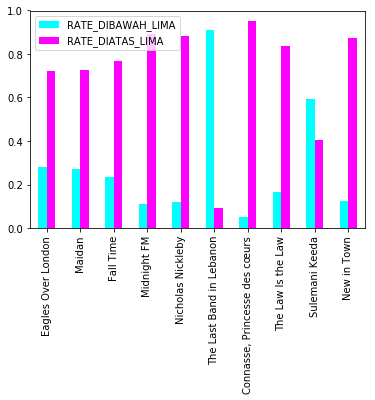

In [27]:
#untuk melihat hasil dalam bentuk grafik
df.plot(kind='bar',colormap='cool')